I am trying to improve, this is my first time for decision tree and random forest.

I am using IBM attrition [dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) to predict the attrition of employee ie. resigned or retiered with no replacement.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [73]:
import numpy as np
import pandas as pd 

In [74]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/IBM attrition.csv') #imported dataset
print(ds)

      Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]


In [75]:
ds.describe() # To get statistics for all the columns at the same time

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [76]:
ds.info() # to find detail about the column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

to see the label of the dataset for 'attrition'

In [77]:
ds['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


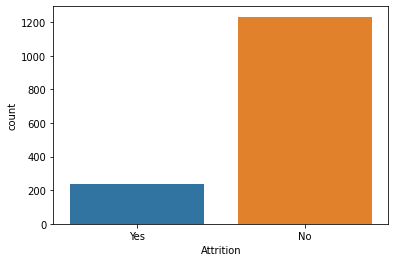

In [78]:
#Graphical view 
import seaborn as sns
sns.countplot(ds['Attrition'])

*dividing columns into numeric and non-numeric data*

In [79]:
n_col=ds.select_dtypes(include='int64')
n_col.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours','EmployeeNumber'], axis="columns", inplace=True) 
s_col=ds.select_dtypes(include='object')
s_col.drop(['Attrition','Over18'], axis="columns", inplace=True) 
print(n_col)
n_col.info()
print("------------")
print(s_col)
s_col.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


      Age  DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
0      41       1102  ...                        0                     5
1      49        279  ...                        1                     7
2      37       1373  ...                        0                     0
3      33       1392  ...                        3                     0
4      27        591  ...                        2                     2
...   ...        ...  ...                      ...                   ...
1465   36        884  ...                        0                     3
1466   39        613  ...                        1                     7
1467   27        155  ...                        0                     3
1468   49       1023  ...                        0                     8
1469   34        628  ...                        1                     2

[1470 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 c

drop column with only one unique value,all unique value and convert the data type or encode it.

In [80]:
ds.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [81]:
ds['Attrition'] = ds.Attrition.astype("category").cat.codes # yes=1 no=0 label
from sklearn.preprocessing import LabelEncoder
ds.drop(['Over18'],axis=1,inplace=True)
label = LabelEncoder()
for c in s_col:
    ds[c] = label.fit_transform(ds[c])


In [82]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In [83]:
#Building train and test dataset
from sklearn.model_selection import train_test_split

x = ds.drop('Attrition', axis=1) #feature
y = ds.Attrition #label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=40)

1. Decision tree and its evaluation

In [84]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42) #by default criterion='gini'
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [85]:
pred= tree.predict(x_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print("Accuracy:\n",accuracy_score(y_test, pred))
print("-------------")
print("Precision:\n",precision_score(y_test, pred))
print("-------------")
print("Recall:\n",recall_score(y_test, pred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, pred)

Accuracy:
 0.7789115646258503
-------------
Precision:
 0.32653061224489793
-------------
Recall:
 0.3333333333333333
-------------
Confusion Matrix:


array([[426,  66],
       [ 64,  32]])

Hyperparameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV

hparams = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 4, 6], 
    "min_samples_leaf":list(range(1, 15)), 
}


htree = DecisionTreeClassifier(random_state=40)
tree_cv = GridSearchCV(htree, hparams, scoring="accuracy", n_jobs=-1, verbose=1, cv=3) # performing hyperparameter tuning
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_ # to return best parameter after tuning
print(f"Best paramters: {best_params})")

atree= DecisionTreeClassifier(**best_params) #training again with tuned parameter
atree.fit(x_train, y_train)

Fitting 3 folds for each of 2352 candidates, totalling 7056 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   25.1s


Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'best'})


[Parallel(n_jobs=-1)]: Done 7056 out of 7056 | elapsed:   33.9s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
apred=atree.predict(x_test)

In [115]:
print("After hyperparameter tuning:")
print("Accuracy:\n",accuracy_score(y_test, apred))
print("-------------")
print("Precision:\n",precision_score(y_test, apred))
print("-------------")
print("Recall:\n",recall_score(y_test, apred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, apred)

After hyperparameter tuning:
Accuracy:
 0.8401360544217688
-------------
Precision:
 0.6666666666666666
-------------
Recall:
 0.041666666666666664
-------------
Confusion Matrix:


array([[490,   2],
       [ 92,   4]])

validation curve 

1. spiltter

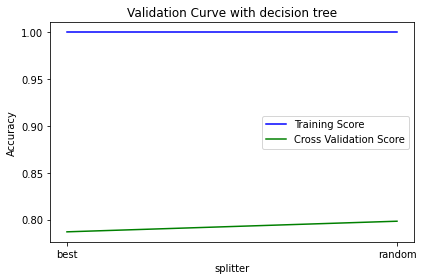

In [96]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'splitter', 
                                param_range = ("best", "random"), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(("best", "random"), mean_train_score,label = "Training Score", color = 'b')
plt.plot(("best", "random"), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for splitter")
plt.xlabel("splitter")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

2. max_depth 
   
   

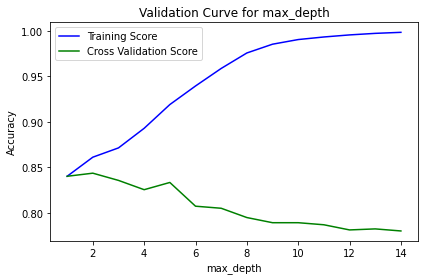

In [107]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = list(range(1, 15)), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(list(range(1, 15)), mean_train_score,label = "Training Score", color = 'b')
plt.plot(list(range(1, 15)), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

3.  min_samples_split 

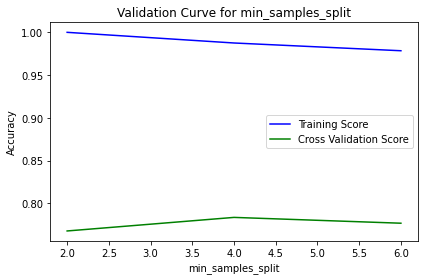

In [112]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = [2, 4, 6], cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot([2, 4, 6], mean_train_score,label = "Training Score", color = 'b')
plt.plot([2, 4, 6], mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

4.  min_samples_leaf 

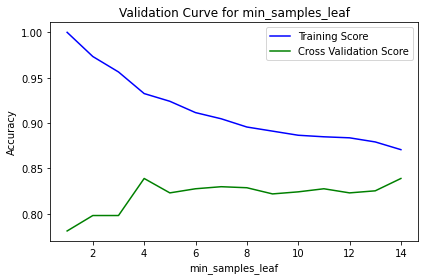

In [116]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = list(range(1, 15)), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(list(range(1, 15)), mean_train_score,label = "Training Score", color = 'b')
plt.plot(list(range(1, 15)), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

2. Random Forest and its evaluation

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=90,criterion='entropy')
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
fpred= forest.predict(x_test)
fpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
print("Accuracy:\n",accuracy_score(y_test, fpred))
print("-------------")
print("Precision:\n",precision_score(y_test, fpred))
print("-------------")
print("Recall:\n",recall_score(y_test, fpred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, fpred)

Accuracy:
 0.8520408163265306
-------------
Precision:
 0.9090909090909091
-------------
Recall:
 0.10416666666666667
-------------
Confusion Matrix:


array([[491,   1],
       [ 86,  10]])

Hyperparameter tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in range(150,1901,75)]
max_features = ['auto','log2', 'sqrt']
max_depth = [int(x) for x in range(1,70,11)]
max_depth.append(None)
min_samples_split = [2 ,3, 4, 5, 7]
min_samples_leaf = [1, 2 , 3, 6, 9]
bootstrap = [True, False]
rprams={'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth, 'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
rforest= RandomForestClassifier(random_state=45)
rf_cv = RandomizedSearchCV(estimator=rforest, scoring='accuracy',param_distributions=rprams, n_iter=200, cv=5,verbose=2, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

arforest= RandomForestClassifier(**rf_best_params)
arforest.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 26.4min finished


Best paramters: {'n_estimators': 375, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 56, 'bootstrap': False})


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=56, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=375,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
afpred=arforest.predict(x_test)

In [128]:
print("After hyperparameter tuning:")
print("Accuracy:\n",accuracy_score(y_test, afpred))
print("-------------")
print("Precision:\n",precision_score(y_test, afpred))
print("-------------")
print("Recall:\n",recall_score(y_test, afpred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, afpred)

After hyperparameter tuning:
Accuracy:
 0.8554421768707483
-------------
Precision:
 0.8235294117647058
-------------
Recall:
 0.14583333333333334
-------------
Confusion Matrix:


array([[489,   3],
       [ 82,  14]])

validation curve for n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf

1. n_estimators

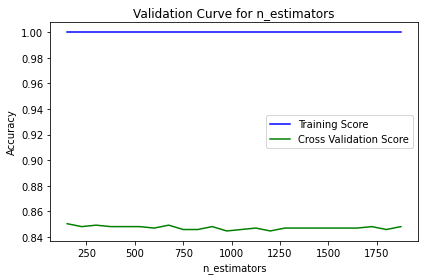

In [118]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = n_estimators, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(n_estimators, mean_train_score,label = "Training Score", color = 'b')
plt.plot(n_estimators, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

2. max_feature

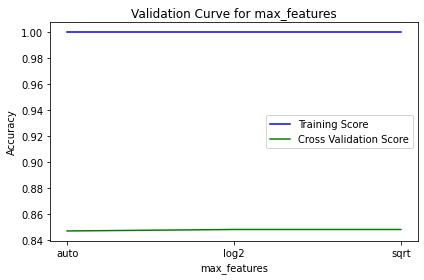

In [120]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = max_features, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(max_features, mean_train_score,label = "Training Score", color = 'b')
plt.plot(max_features, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_features")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

3. max_depth

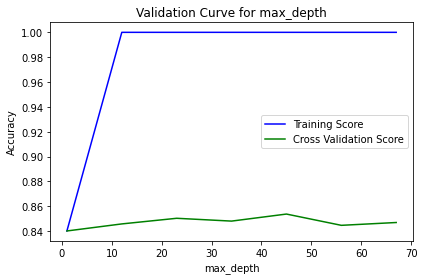

In [129]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = max_depth, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(max_depth, mean_train_score,label = "Training Score", color = 'b')
plt.plot(max_depth, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

4. min_samples_split

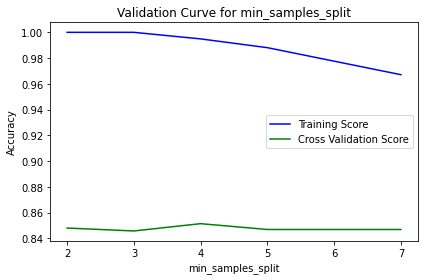

In [124]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = min_samples_split, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(min_samples_split, mean_train_score,label = "Training Score", color = 'b')
plt.plot(min_samples_split, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

5. min_samples_leaf

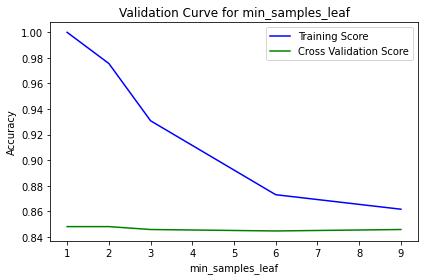

In [125]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = min_samples_leaf, cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(min_samples_leaf, mean_train_score,label = "Training Score", color = 'b')
plt.plot(min_samples_leaf, mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

Comparing Decision tree and Random forest model.

In [130]:
from sklearn.metrics import mean_absolute_error
print("MAE for tree:",mean_absolute_error(y_test, apred))
print("MAE for forest:",mean_absolute_error(y_test, afpred))

MAE for tree: 0.1598639455782313
MAE for forest: 0.1445578231292517


In [131]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve,roc_auc_score
#tree
t_fpr, t_tpr, _ = roc_curve(y_test, apred)
t_auc = roc_auc_score(y_test, apred)
#forest
f_fpr, f_tpr, _ = roc_curve(y_test, afpred)
f_auc = roc_auc_score(y_test, afpred)

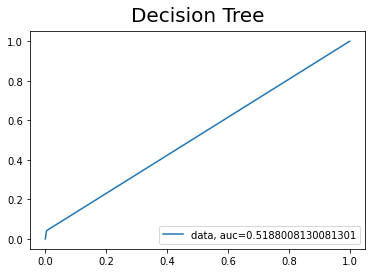

In [132]:
plt.plot(t_fpr,t_tpr,label="data, auc="+str(t_auc))
plt.legend(loc=4)
plt.title('Decision Tree',fontdict={'fontsize':20},pad=10)
plt.show()

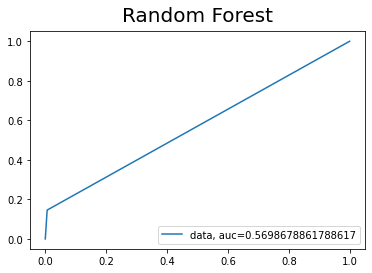

In [133]:
plt.plot(f_fpr,f_tpr,label="data, auc="+str(f_auc))
plt.legend(loc=4)
plt.title('Random Forest',fontdict={'fontsize':20},pad=10)
plt.show()